# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/43 [00:00<?, ?it/s]

[285, 262, 308, 326, 320, 332, 334, 286, 349, 333, 295, 292, 307]
2 chs: 285 entries
3 chs: 262 entries
4 chs: 308 entries
5 chs: 326 entries
6 chs: 320 entries
7 chs: 332 entries
8 chs: 334 entries
9 chs: 286 entries
10 chs: 349 entries
15 chs: 333 entries
20 chs: 295 entries
30 chs: 292 entries
40 chs: 307 entries
Dataset entries: 3406


 74%|███████▍  | 32/43 [00:12<00:05,  1.88it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:12<00:01,  3.03it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:04,  7.55it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:11<00:03,  2.82it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:12<00:01,  4.08it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 74%|███████▍  | 32/43 [00:10<00:06,  1.65it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:12<00:02,  2.43it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:07,  4.58it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:10<00:04,  2.51it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:11<00:01,  3.30it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:14<00:02,  2.02it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:03, 10.75it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:12<00:01,  2.96it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:13<00:01,  2.64it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:05,  6.38it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:12<00:01,  2.92it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:13<00:01,  3.11it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:01<00:04,  6.98it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:11<00:03,  2.78it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:12<00:01,  3.42it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:12<00:00,  3.45it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['LassoCV', 'ElasticNetCV', 'GradientBoostingRegressor', 'BayesianRidge', 'RidgeCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = 30)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perAmp-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.3, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2, 2):
        model = MultiOutputRegressor(BayesianRidge())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 2])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 18.  0. 19.  1. 19.  1. 21.  0.] [1.69909315e+01 1.55726832e-02 1.84222449e+01 3.98079227e-01
 1.87751777e+01 7.74986440e-01 1.99634612e+01 2.04242934e+00
 2.27173056e+01 6.14451474e-01]
[17.  0. 18.  0. 18.  0. 21.  4. 20.  0.] [17.00486702  0.0229365  18.39061313  0.37265624 18.83634715  0.83620032
 19.77219602  1.84337892 22.64441666  0.63422276]
[17.  0. 19.  1. 20.  2. 19.  1. 24.  0.] [17.07697736  0.14180566 18.40844633  0.41751671 18.86649622  0.83852634
 19.24403574  1.26497495 22.3858289   0.52596717]
[17.  0. 18.  0. 20.  2. 19.  1. 24.  3.] [17.13792472  0.24624242 18.44897881  0.36621965 18.65827943  0.64341439
 19.1192014   1.13888093 22.33412593  0.74629541]
[17.  0. 19.  1. 18.  0. 22.  4. 24.  0.] [17.01038383  0.04754642 18.27918342  0.25965742 18.7310938   0.7261859
 19.69586387  1.84648965 22.31623719  0.37337644]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2, 2):
        model = MultiOutputRegressor(RandomForestRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 2])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF")
count += 1

[17.  0. 18.  0. 19.  1. 19.  1. 21.  0.] [1.69869053e+01 1.63196849e-02 1.84255311e+01 3.95492786e-01
 1.87845602e+01 7.74301499e-01 1.99477816e+01 2.04057166e+00
 2.28614448e+01 6.12876529e-01]
[17.  0. 18.  0. 18.  0. 21.  4. 20.  0.] [17.00413438  0.02360034 18.38650078  0.37923114 18.83997467  0.83743227
 19.77383723  1.84659938 22.77008137  0.6316438 ]
[17.  0. 19.  1. 20.  2. 19.  1. 24.  0.] [17.0821436   0.14816946 18.40451251  0.41855459 18.91537808  0.89626786
 19.21528369  1.2408422  22.39799642  0.53438006]
[17.  0. 18.  0. 20.  2. 19.  1. 24.  3.] [17.1341638   0.25099537 18.4583453   0.36928211 18.65146752  0.6271383
 19.11271127  1.13235715 22.27884782  0.74507338]
[17.  0. 19.  1. 18.  0. 22.  4. 24.  0.] [16.9950533   0.03100307 18.26057325  0.24191617 18.71651852  0.71229759
 19.71793993  1.89909035 22.30305386  0.34244128]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2, 2):
        model = MultiOutputRegressor(DecisionTreeRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 2])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 18.  0. 19.  1. 19.  1. 21.  0.] [1.69901478e+01 1.47783251e-02 1.84236453e+01 3.99014778e-01
 1.87783251e+01 7.78325123e-01 1.99655172e+01 2.04433498e+00
 2.28620690e+01 6.10837438e-01]
[17.  0. 18.  0. 18.  0. 21.  4. 20.  0.] [1.70044444e+01 2.22222222e-02 1.83911111e+01 3.73333333e-01
 1.88400000e+01 8.40000000e-01 1.97733333e+01 1.84444444e+00
 2.27866667e+01 6.31111111e-01]
[17.  0. 19.  1. 20.  2. 19.  1. 24.  0.] [17.08547009  0.14957265 18.40598291  0.41452991 18.91452991  0.88888889
 19.22222222  1.24358974 22.41880342  0.53846154]
[17.  0. 18.  0. 20.  2. 19.  1. 24.  3.] [17.13930348  0.24875622 18.45273632  0.3681592  18.65671642  0.64179104
 19.11442786  1.13432836 22.27860697  0.75124378]
[17.  0. 19.  1. 18.  0. 22.  4. 24.  0.] [16.9955157   0.03139013 18.26008969  0.24215247 18.71748879  0.72197309
 19.7264574   1.88340807 22.30044843  0.34529148]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2, 2):
        model = MultiOutputRegressor(LassoCV())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 2])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 18.  0. 19.  1. 19.  1. 21.  0.] [1.69938979e+01 2.10194073e-02 1.84175263e+01 3.98832511e-01
 1.87701925e+01 7.69421458e-01 1.99568458e+01 2.03104158e+00
 2.27545735e+01 6.17593627e-01]
[17.  0. 18.  0. 18.  0. 21.  4. 20.  0.] [17.00586355  0.02463823 18.38763341  0.37314124 18.82909128  0.83070198
 19.76529388  1.82898387 22.59049075  0.63964209]
[17.  0. 19.  1. 20.  2. 19.  1. 24.  0.] [17.08009685  0.14652341 18.40604008  0.41457695 18.91408996  0.87411769
 19.22293632  1.24434992 22.39287305  0.53700901]
[17.  0. 18.  0. 20.  2. 19.  1. 24.  3.] [17.13912459  0.24840263 18.44701427  0.36775179 18.65671642  0.64179104
 19.12584631  1.15387917 22.33625922  0.75124378]
[17.  0. 19.  1. 18.  0. 22.  4. 24.  0.] [17.00051084  0.03686299 18.26362827  0.25023079 18.7253195   0.72205277
 19.7255119   1.87504896 22.32343961  0.36032616]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2, 2):
        model = MultiOutputRegressor(DummyRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 2])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM")
count += 1

[17.  0. 18.  0. 19.  1. 19.  1. 21.  0.] [17.04632249  0.10466761 18.40912306  0.38224894 18.70367751  0.69554455
 19.49681754  1.54384724 22.39674682  0.54490806]
[17.  0. 18.  0. 18.  0. 21.  4. 20.  0.] [17.05127298  0.11067893 18.40947666  0.38401697 18.70898161  0.6980198
 19.48691655  1.53465347 22.39250354  0.55056577]
[17.  0. 19.  1. 20.  2. 19.  1. 24.  0.] [17.0466761   0.1039604  18.40523338  0.38295615 18.70862801  0.6976662
 19.52758133  1.57956153 22.4009901   0.54809052]
[17.  0. 18.  0. 20.  2. 19.  1. 24.  3.] [17.04985856  0.10714286 18.39992928  0.37553041 18.72736917  0.7188826
 19.51449788  1.56400283 22.40558699  0.55834512]
[17.  0. 19.  1. 18.  0. 22.  4. 24.  0.] [17.05445545  0.11138614 18.39886846  0.3748232  18.71322489  0.70685997
 19.49186704  1.5417256  22.34476662  0.54950495]


dict_keys(['LassoCV', 'ElasticNetCV', 'GradientBoostingRegressor', 'BayesianRidge', 'RidgeCV'])
### Gain ###
Mean: 0.7749407551975235. Median: 0.7588661907086859
Mean: 0.7730540166320017. Median: 0.7565772326644143
Mean: 0.7730871474639477. Median: 0.7566037735849065
Mean: 0.7741567338211621. Median: 0.7580328978786277
Mean: 0.7885987376266772. Median: 0.7716407355021211
### Loss ###
Mean: 0.5807077215148944. Median: 0.5497174743470892
Mean: 0.5786837503254609. Median: 0.5474936127206238
Mean: 0.5787024588026054. Median: 0.5476394849785408
Mean: 0.5795470808785178. Median: 0.5479551699477623
Mean: 0.6043633153799423. Median: 0.5772277227722771
Mean Total - Gain: 0.7767674781482624. Loss: 0.5844008653802841


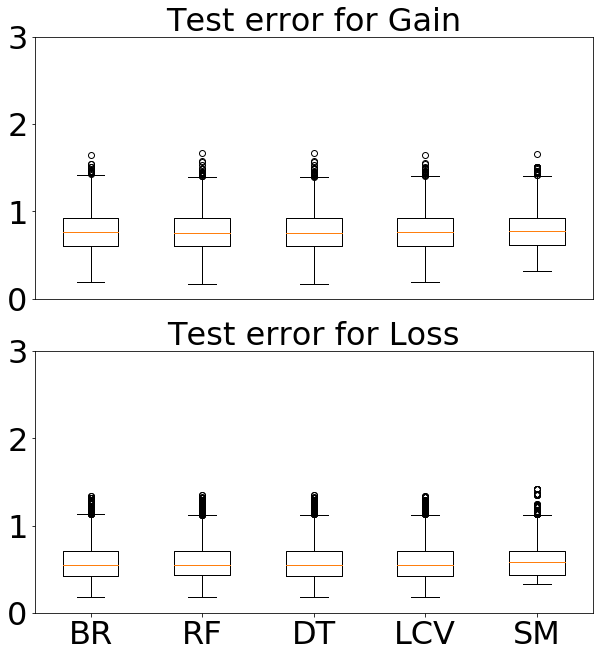

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}".format(np.mean(gainError), np.median(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}".format(np.mean(lossError), np.median(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])